# <h1 align=center> **PROYECTO INDIVIDUAL Nº1** </h1>
# <h1 align=center>**`Machine Learning Operations (MLOps) Engineer`**</h1>

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables del dataset, ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Por lo tanto, un mapa de calor y un gráfico de cajas permite conocer qué tantos registros nulos y outliers o anomalías existen. Asímismo, las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en las columnas, las cuales podrían ayudar al sistema de recomendación.

## **Análisis exploratorio de los datos (Exploratory Data Analysis-EDA)**

Importar las librerias necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Se importa el dataset 'movies_credits.csv' desde el repositorio de GitHub donde se aloja el proyecto. Así se prueba la funcionalidad del mismo.

In [25]:
url_csv = 'https://raw.githubusercontent.com/aldemarbr94/PI_MLOps/main/movies_credits.csv'
df_movies_credits = pd.read_csv(url_csv)
df_movies_credits = df_movies_credits.iloc[:,1:]
df_movies_credits.head(2)

,id,title,director,name_belongs,overview,genres,original_language,spoken_languages,popularity,release_date,...,production_companies,production_countries,runtime,status,tagline,vote_average,vote_count,budget,revenue,return
0,862,Toy Story,['John Lasseter'],Toy Story Collection,"Led by Woody, Andy's toys live happily in his ...","['Animation', 'Comedy', 'Family']",en,['en'],21.946943,1995-10-30,...,['Pixar Animation Studios'],['US'],81.0,Released,NaN,7.7,5415.0,30000000.0,373554033.0,12.451801
1,8844,Jumanji,['Joe Johnston'],NaN,When siblings Judy and Peter discover an encha...,"['Adventure', 'Fantasy', 'Family']",en,"['en', 'fr']",17.015539,1995-12-15,...,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],104.0,Released,Roll the dice and unleash the excitement!,6.9,2413.0,65000000.0,262797249.0,4.043035


Con el siguiente mapa de calor se observa gráficamente los valores nulos existentes en cada columna, lo que sería útil para saber qué columna usar en el sistema de recomendación.

>**`Mapa de calor`**

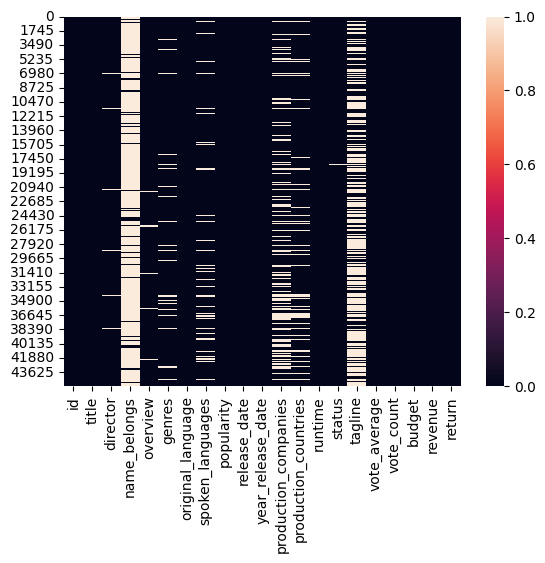

In [3]:
sns.heatmap(df_movies_credits.isnull()) 
plt.show()

Las columnas 'name_belongs' y 'tagline' son las que más valores nulos poseen, seguidas de 'production_companies', 'production_countries' y 'spoken_languages'.

Por otra parte, se realiza un diagrama de caja a las columnas numéricas para observar a simple vista la mediana, los cuartiles de los datos, ​y también sus valores atípicos.

>**`Diagrama de cajas`**

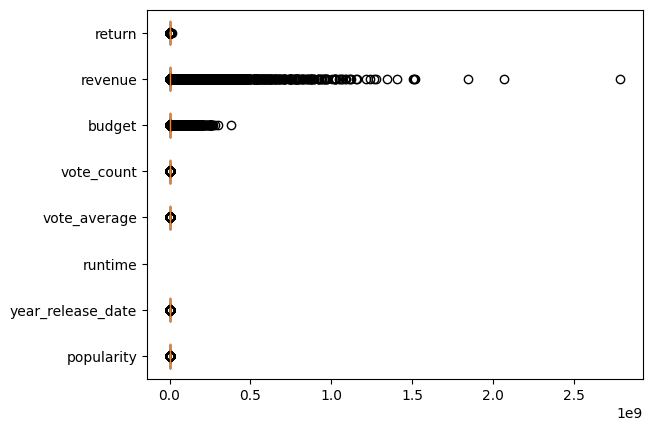

In [4]:
plt.boxplot([df_movies_credits['popularity'], 
             df_movies_credits['year_release_date'], 
             df_movies_credits['runtime'], 
             df_movies_credits['vote_average'],
             df_movies_credits['vote_count'], 
             df_movies_credits['budget'], 
             df_movies_credits['revenue'], 
             df_movies_credits['return']],
             vert=False,
             labels=['popularity','year_release_date','runtime','vote_average','vote_count','budget','revenue','return'])
plt.show()

Si se usa alguna variable de estas para construir el modelo de recomendación se profundizará y analizará más adelante este diagrama junto al siguiente que representa la correlación entre las mismas variables.

>**`Correlación`**

C:\Users\M&A\AppData\Local\Temp\ipykernel_7540\1806613201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlac = df_movies_credits.corr()


<Axes: >

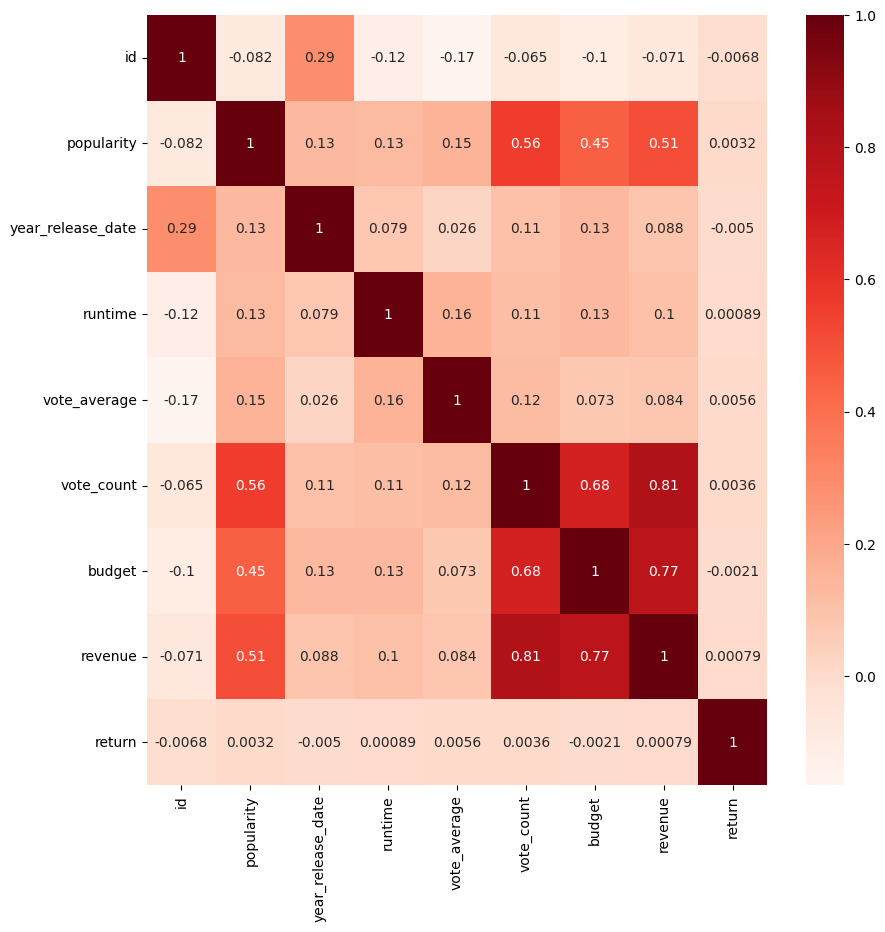

In [5]:
correlac = df_movies_credits.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlac, annot=True, cmap='Reds')

Mediante el mapa de calor, se observa fácilmente que las variables 'revenue' y 'vote_count' son las columnas que más correlación poseen (0.81) lo que nos indica que la recaudación de la pelicula (en dólares) y su número de votos recibidos (en TMDB) tienen una estrecha relación.

>**`Nube de palabras`**

Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en las columnas. En este caso se usa para la columna 'title'.

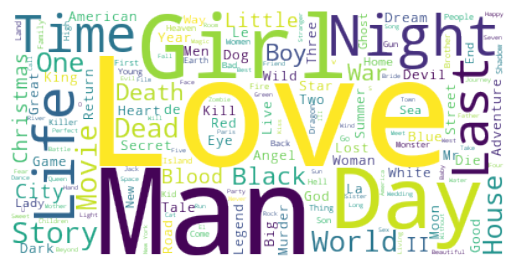

In [6]:
texto_title = ''
for i in df_movies_credits['title']:
    texto_title += i + ' ' 

mapa_palabras = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(texto_title)
plt.imshow(mapa_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Sistema de recomendación**

Para el sistema de recomendación se hace uso del método 'TF-IDF' (Frecuencia de Término – Frecuencia Inversa de Documento). Este es un algoritmo muy común para transformar el texto en una representación significativa de números, es decir, calcula la frecuencia con la que una palabra dada aparece dentro de un documento y le asigna una puntuación. Así que mediante 'TfidfVectorizer' se tokeniza dichas palabras, luego este aprende el vocabulario (palabras) y las ponderaciones inversas de frecuencia, generadas con 'TfidfTransformer', lo que reduce la escala de las palabras que aparecen mucho.

Por otra parte, se hace uso de la columna 'name_belongs' del dataset para dar la recomendación de las películas. Cabe aclarar que aunque es una de las columnas que más valores nulos tiene, es la que mejor resultado genera si se compara con las columnas 'genres', 'production_companies' y 'production_countries'.

También es importante aclarar el uso de los primeros 5000 registros del dataset para la recomendación puesto que si se usan más, Render arroja error de memoria.


In [51]:
url_csv = 'https://raw.githubusercontent.com/aldemarbr94/PI_MLOps/main/movies_credits.csv'
df_movies_credits_ML = pd.read_csv(url_csv)

In [52]:
df_movies_credits_ML = df_movies_credits_ML.iloc[:5000,1:]

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df_movies_credits_ML['name_belongs'] = df_movies_credits_ML['name_belongs'].fillna('')
tfidf_matrix = tfidf.fit_transform(df_movies_credits_ML['name_belongs'])

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df_movies_credits_ML.index, index=df_movies_credits_ML['title']).drop_duplicates()


#@app.get('/recomendacion/{titulo}')
def recomendacion(titulo:str):
    try:
        '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
        
        idx = indices[titulo]
        sim_scores = list(enumerate(cosine_sim[idx]))

        for i in range(len(sim_scores)):
            for n in range(len(sim_scores[i])):
                if n%2 == 0 and sim_scores[i][n] == idx:
                    sim_scores[i] = (idx,-0.01)
        
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:5]
        movie_indices = [i[0] for i in sim_scores]

        recomendacion =  list(df_movies_credits['title'].iloc[movie_indices])
        
        return {'lista recomendada': recomendacion}
    except:
        return 'Película no existente'

In [54]:
recomendacion('Toy Story')

{'lista recomendada': ['Toy Story 2',
  'Police Story 3: Supercop',
  'Project S',
  'First Strike',
  'The Neverending Story III: Escape from Fantasia']}